# Sample Sales Dataset

## --> Create Dataframe

In [100]:
import pandas as pd

url = 'https://drive.google.com/file/d/1iQYM29RKkQFi_vJGP8rKyLzKjoO58DxY/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


It should be noted here that 'Sales' = 'QuantityOrdered' * 'PriceEach'

## 1) Preprocessing

### i] Keeping only those columns which are necessary:-

In [101]:
df = df[['QUANTITYORDERED','PRICEEACH','SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID','PRODUCTLINE','MSRP', 'COUNTRY', 'DEALSIZE']]

In [102]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2871.00,1,2,2003,Motorcycles,95,USA,Small
1,34,81.35,2765.90,2,5,2003,Motorcycles,95,France,Small
2,41,94.74,3884.34,3,7,2003,Motorcycles,95,France,Medium
3,45,83.26,3746.70,3,8,2003,Motorcycles,95,USA,Medium
4,49,100.00,5205.27,4,10,2003,Motorcycles,95,USA,Medium


In [103]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
SALES              0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
COUNTRY            0
DEALSIZE           0
dtype: int64

No nulls found

### ii] Convert categorical columns to numerical

First we check existing categorical columns

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   QTR_ID           2823 non-null   int64  
 4   MONTH_ID         2823 non-null   int64  
 5   YEAR_ID          2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   COUNTRY          2823 non-null   object 
 9   DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 220.7+ KB


In [105]:
for col in df:
    if df[col].dtypes == 'object':
        print(f'\n{col} --> {df[col].unique()}')


PRODUCTLINE --> ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']

COUNTRY --> ['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']

DEALSIZE --> ['Small' 'Medium' 'Large']


We will OneHotEncode the categorical columns

In [106]:
df = pd.get_dummies(data=df, columns=['PRODUCTLINE','COUNTRY','DEALSIZE'])

In [107]:
df.sample(5)

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
1403,30,66.99,2009.70,2,4,2004,71,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1201,31,52.84,1638.04,2,5,2004,62,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2211,37,41.03,1518.11,3,8,2004,40,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2136,40,88.12,3524.80,3,8,2004,80,1,0,0,...,0,0,0,0,1,0,0,0,1,0
572,39,99.52,3881.28,4,12,2004,157,0,0,1,...,0,0,0,0,0,1,0,0,1,0


## 2) Plot Elbow Plot

This will help us determine no. of clusters

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [109]:
distortions = []
K = range(1,10)
for k in K:
    KMeansModel = KMeans(n_clusters=k)
    KMeansModel.fit(df)
    distortions.append(KMeansModel.inertia_)

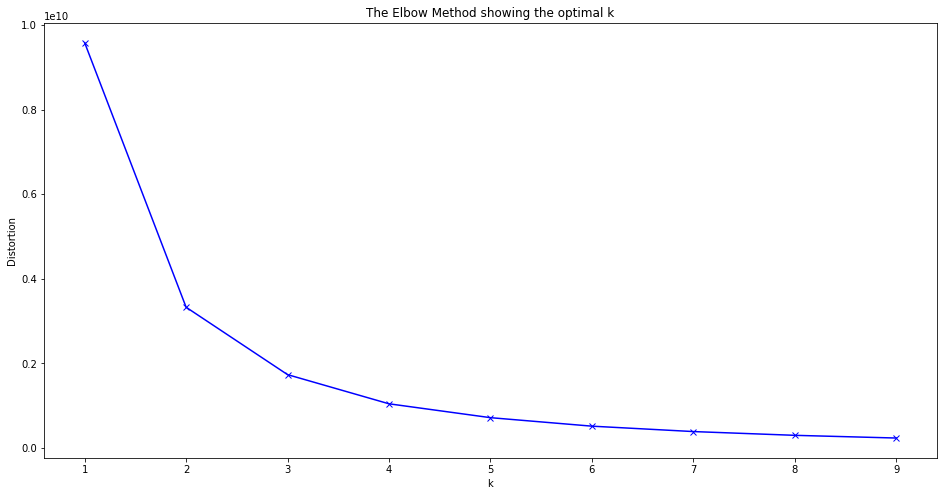

In [110]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Elbow can be observed at k = 3 after which the curve decreases very gradually

## 3) KMeans Clustering

In [111]:
import numpy as np

In [112]:
X_train = df.values      #Returns a numpy array.

In [113]:
KMeansModel = KMeans(n_clusters=3)
KMeansModel = KMeansModel.fit(X_train)
predictions = KMeansModel.predict(X_train)

In [114]:
unique,counts = np.unique(predictions,return_counts=True)

counts = counts.reshape(1,3)

counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])

counts_df.head()

,Cluster1,Cluster2,Cluster3
0,375,1088,1360


### --> Plot

In [115]:
from sklearn.decomposition import PCA #Linear Dimensionality reduction.

In [116]:
pca = PCA(n_components=2) #Converting all the features into 2 columns to make it easy to visualize using Principal COmponent Analysis.

reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2']) #Creating a DataFrame.

reduced_X.head()

,PCA1,PCA2
0,-682.810194,-8.355118
1,-787.988725,-5.655094
2,330.427142,8.341562
3,192.733459,9.837467
4,1651.251424,27.530398


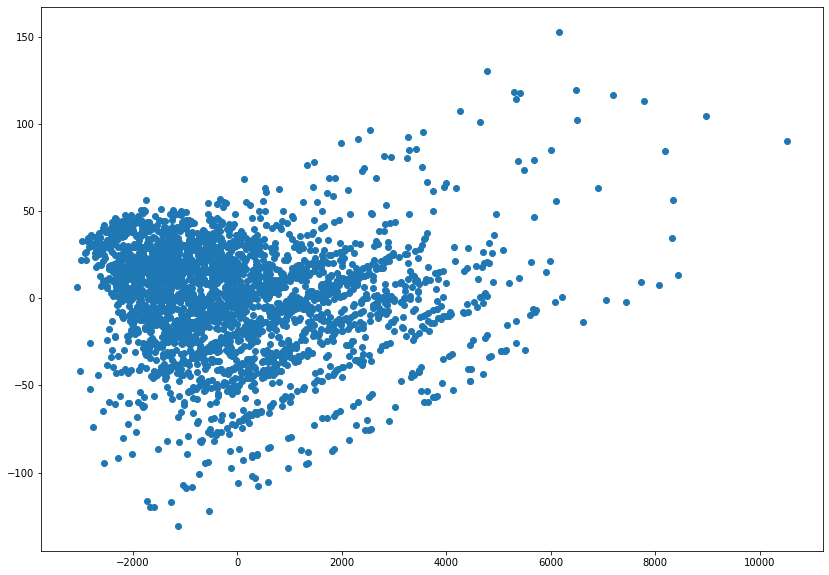

In [117]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])

In [118]:
KMeansModel.cluster_centers_ #Finding the centriods. (3 Centriods in total. Each Array contains a centroids for particular feature )

reduced_centers = pca.transform(KMeansModel.cluster_centers_) #Transforming the centroids into 3 in x and y coordinates

reduced_centers

array([[ 3.53449756e+03,  6.19385496e+00],
       [ 5.75777485e+02, -5.96433627e+00],
       [-1.43520771e+03,  3.06360460e+00]])

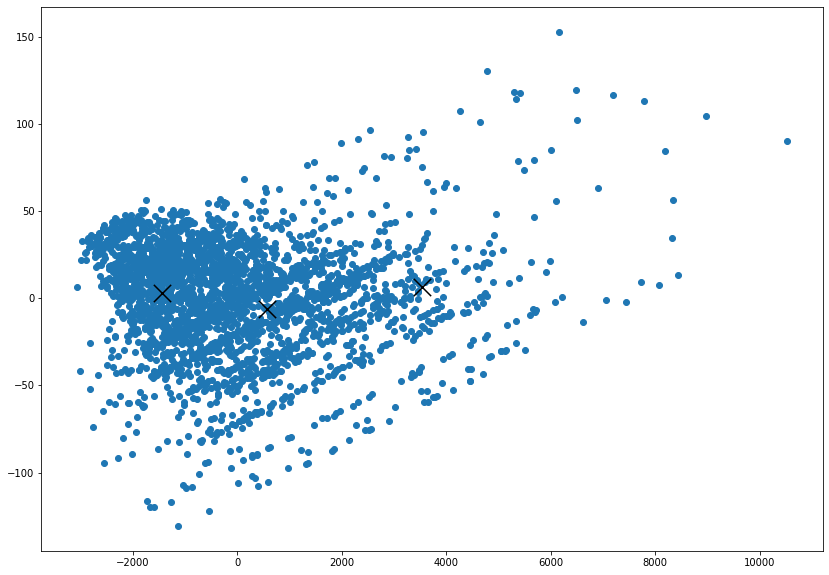

In [119]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300) #Plotting the centriods

In [120]:
reduced_X['Clusters'] = predictions #Adding the Clusters to the reduced dataframe.

reduced_X.head()

,PCA1,PCA2,Clusters
0,-682.810194,-8.355118,2
1,-787.988725,-5.655094,2
2,330.427142,8.341562,1
3,192.733459,9.837467,1
4,1651.251424,27.530398,1


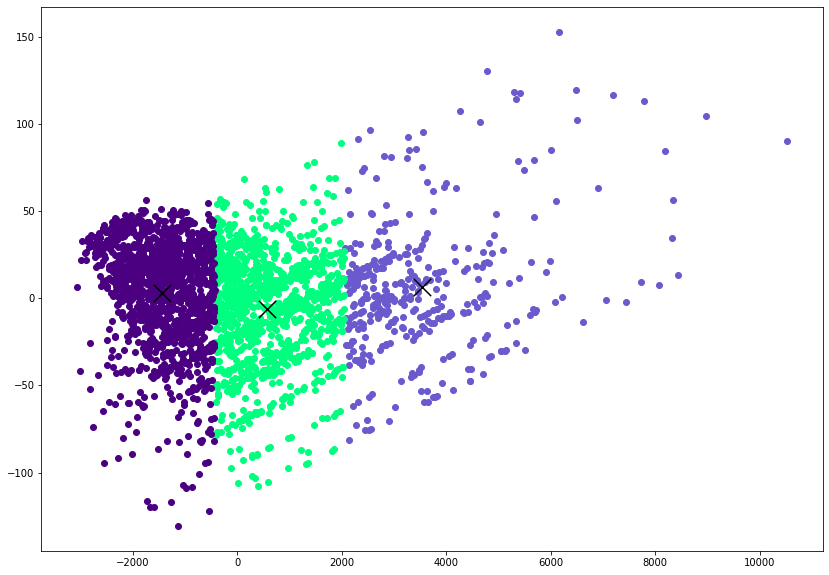

In [121]:
#Plotting the clusters 
plt.figure(figsize=(14,10))
#                     taking the cluster number and first column           taking the same cluster number and second column      Assigning the color
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],color='slateblue')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],color='springgreen')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],color='indigo')


plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)

Sources<br>
https://medium.com/mlearning-ai/customer-segmentation-using-k-means-clustering-ae73e3d82934<br>
https://www.youtube.com/watch?v=iNlZ3IU5Ffw<br>
https://realpython.com/k-means-clustering-python/